In [111]:
import numpy as np
import matplotlib.pylab as plt
import timeit

# Invert randomly generated matrices with varying dimensions
# and time how long each inversion takes.
results = {}
for n in range(10, 5000, 500):
    result = %timeit -q -o np.linalg.inv(np.random.rand(n, n))
    results[n] = result.worst

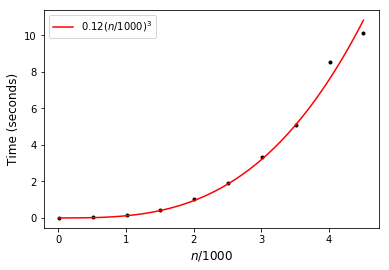

In [114]:
# We will now fit the following model to the data:
# y = theta * n^3, where y is the time it
# takes to invert an (n x n) dimensional matrix.

# Our data. Normalize n by 1000
n = np.array(results.keys()) / 1000.0
y = np.array(results.values())

# Create design matrix
design_mat = lambda n: np.reshape(n**3, (len(n), 1))
# Use normal equation to estimate theta
X = design_mat(n)
thetas = np.linalg.inv(np.transpose(X).dot(X)).dot(np.transpose(X)).dot(y)
# Predit inversion time in between data points
num_features = np.linspace(min(n), max(n), 100)
times = design_mat(num_features).dot(thetas)

# Plot data
plt.plot(n, y, 'k.')
# Plot fit
plt.plot(num_features, times, 'r-', label=r"${:.2f}(n/1000)^3$".format(thetas[0]))
plt.xlabel(r'$n/1000$', size=12)
plt.ylabel('Time (seconds)', size=12)
plt.legend()
plt.savefig('inv_time.pdf')